In [3]:
from src.regular_tt_cross.integrators import (
    ttrc_integrator,
    greedy_cross_integrator,
    tracked_greedycross_integrator,
    tracked_ttrc_integrator,
)

import numba as nb
import matplotlib.pyplot as plt
import numpy as np
from src.utils.functions import *

In [4]:
# Some example functions which can be compiled with numba (also found in the utils.functions module)


def test_function1(x: np.ndarray) -> np.ndarray:
    return np.log(np.prod(x))


def test_function2(x: np.ndarray) -> float:
    return np.sin(sum(x)) * np.prod(x * np.exp(-x)) * (3 * np.linalg.norm(x) + 1 + x[0])


def test_function3(x: np.ndarray) -> float:
    return np.sin(sum(x)) * np.prod(np.exp(-x))


def test_function4(x: np.ndarray) -> float:
    return 1 / (1 + np.sum(x))


def test_function5(x: np.ndarray) -> np.ndarray:
    return np.prod(np.sin(x) / 2)

In [12]:
# We showcase the integrators with th C_n Ising intgeral shown in https://www.davidhbailey.com/dhbpapers/ising.pdf


def test_function(x: np.ndarray) -> np.float64:
    t1 = 0
    for k in range(x.shape[0]):
        t1 += np.prod(x[: k + 1])

    t2 = 0
    for k in range(x.shape[0]):
        t2 += np.prod(x[k:])

    return 2.0 / ((1.0 + t1) * (1.0 + t2))

## TTRC algorithm (both in its regular form and the tracked one)

In [15]:
integrator = tracked_ttrc_integrator(
    func=test_function,
    num_variables=8,
    intervals=np.array([[0, 1] for _ in range(8)]),
    points_per_variable=10,
    sweeps=4,
    initial_bond_guess=2,
    max_bond=8,
    quadrature="Gauss",
    truncation_tol=0,
    maxvol_tol=1e-8,
)
integrator.integrate()

Function successfully compiled with numba.
Initialization done after time: 0.021109580993652344 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4


0.6330297042045279

In [16]:
integrator.evolution

[[42600, 0.6331418053922471],
 [109800, 0.6330711054862881],
 [177000, 0.6331248087006183],
 [244200, 0.6330297042045279]]

In [17]:
integrator.bonds

array([8, 8, 8, 8, 8, 8, 8])

In [18]:
integrator2 = ttrc_integrator(
    func=test_function,
    num_variables=8,
    intervals=np.array([[0, 1] for _ in range(8)]),
    points_per_variable=10,
    sweeps=4,
    initial_bond_guess=2,
    max_bond=8,
    quadrature="Gauss",
    truncation_tol=0,
    maxvol_tol=1e-8,
)
integrator2.integrate()

Function successfully compiled with numba.
Initialization done after time: 0.016794443130493164 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4


0.6330297042045279

In [19]:
integrator2.interpolator.func_calls

244200

## Greedy-cross algorithm (both in its regular form and tracked version)

In [21]:
integrator3 = tracked_greedycross_integrator(
    func=test_function,
    num_variables=8,
    intervals=np.array([[0, 1] for _ in range(8)]),
    points_per_variable=10,
    sweeps=5,
    max_bond=10,
    quadrature="Gauss",
    pivot_finder_tol=1e-8,
)

integrator3.integrate()

Function successfully compiled with numba.
Initialization succesfully done after time: 0.0010654926300048828 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5


0.6330801536693172

Text(0.5, 1.0, 'Integral value vs function calls')

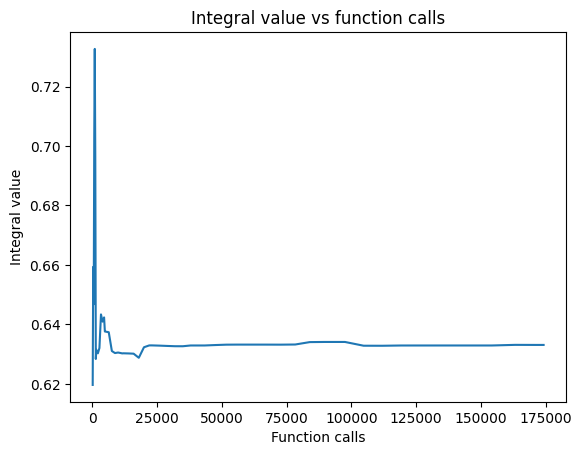

In [24]:
x = [val[0] for val in integrator3.evolution]
y = [val[1] for val in integrator3.evolution]

plt.plot(x, y)
plt.xlabel("Function calls")
plt.ylabel("Integral value")
plt.title("Integral value vs function calls")

In [25]:
# The non tracked version of the greedy cross is much faster

integrator2 = greedy_cross_integrator(
    func=test_function,
    num_variables=8,
    intervals=np.array([[0, 1] for _ in range(8)]),
    points_per_variable=10,
    sweeps=5,
    max_bond=10,
    quadrature="Gauss",
    pivot_finder_tol=1e-8,
)

integrator2.integrate()

Function successfully compiled with numba.
Initialization succesfully done after time: 0.0015037059783935547 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5


0.6331247597881215

In [26]:
integrator2.interpolator.bonds

array([ 9, 10, 10, 10, 10, 10,  9])

In [27]:
integrator2.interpolator.func_calls

174200